# Titanic Survival Analysis
![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg)

## 1. Data Loading and Preparation

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Set style for plots
sns.set_style('whitegrid')
%matplotlib inline

In [30]:
# Load data
df = pd.read_csv("titanic.csv")

# Display basic info
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Data Preprocessing

In [ ]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[0, 16, 32, 48, 100], 
                        labels=['child', 'young', 'adult', 'old'])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encoding
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
age_dummies = pd.get_dummies(df['AgeGroup'], prefix='Age')

# Prepare final features
X = pd.concat([df[['Pclass', 'Sex', 'Age', 'FamilySize', 'IsAlone']], 
               embarked_dummies, age_dummies], axis=1)
y = df['Survived']

## 3. Exploratory Data Analysis

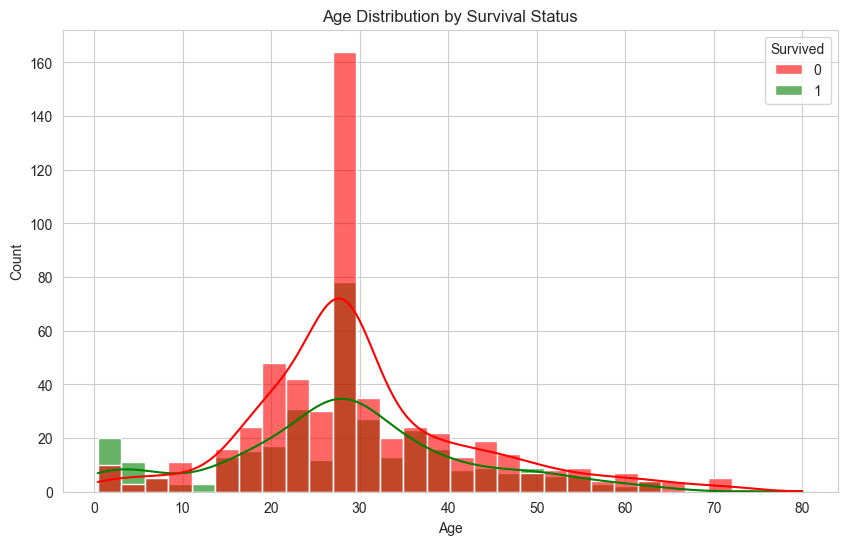

In [22]:
# Plot age distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True,
             palette={0: 'red', 1: 'green'}, alpha=0.6)
plt.title('Age Distribution by Survival Status')
plt.show()

C:\Users\edroz\AppData\Local\Temp\ipykernel_10084\2945809439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')


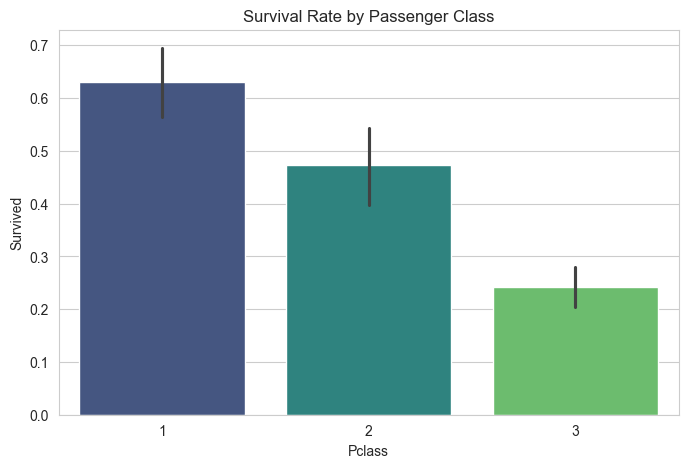

In [23]:
# Survival rate by passenger class
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.show()

## 4. Machine Learning Modeling

In [24]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 81.56%


## 5. Feature Importance Analysis

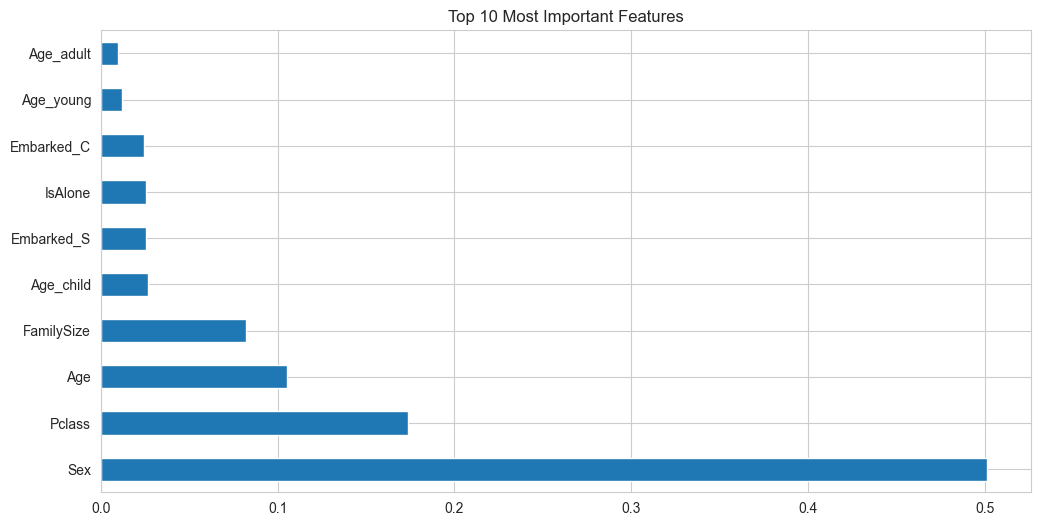

TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'quality'

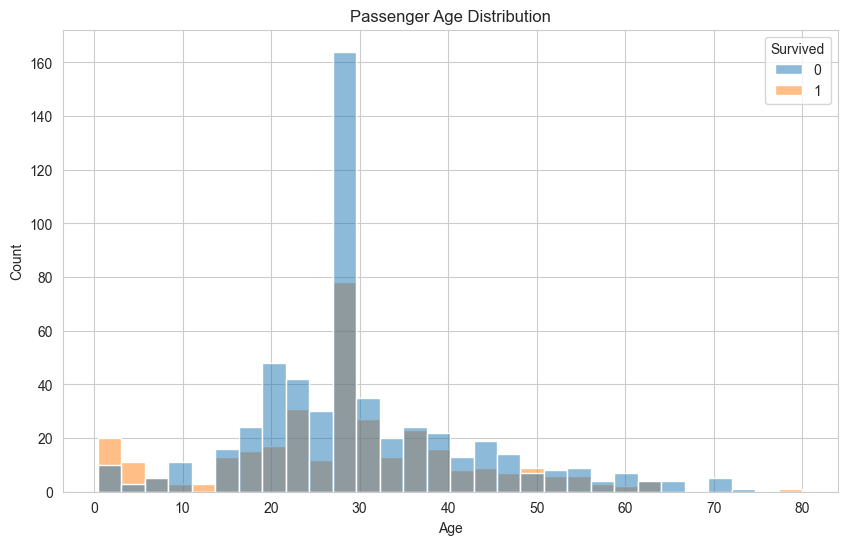

In [28]:
# Plot feature importance
plt.figure(figsize=(12,6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.show()